In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
!python --version


Python 3.10.12


In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
#IMAGE_SIZE = 256
IMAGE_SIZE = 224
BATCH_SIZE =32
CHANNELS = 3
EPOCHS = 50

In [ ]:
import os

# Chemins des sous-dossiers
notumor_folder = "/content/drive/MyDrive/Dataset_MRI_tumor_types/notumor"
pituitary_folder = "/content/drive/MyDrive/Dataset_MRI_tumor_types/pituitary"
meningioma = "/content/drive/MyDrive/Dataset_MRI_tumor_types/meningioma"
glioma = "/content/drive/MyDrive/Dataset_MRI_tumor_types/glioma"

# Fonction pour compter les fichiers dans un dossier
def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Compter les images dans chaque sous-dossier
notumor_count = count_images(notumor_folder)
pituitary_count = count_images(pituitary_folder)
large_cell_carcinoma_count = count_images(meningioma)
squamous_cell_carcinoma_count = count_images(glioma)

# Afficher le nombre d'images dans chaque dossier
print(f"Nombre d'images dans le dossier 'notumor' : {notumor_count}")
print(f"Nombre d'images dans le dossier 'pituitary' : {pituitary_count}")
print(f"Nombre d'images dans le dossier 'meningioma' : {large_cell_carcinoma_count}")
print(f"Nombre d'images dans le dossier 'glioma' : {squamous_cell_carcinoma_count}")


Nombre d'images dans le dossier 'notumor' : 2000
Nombre d'images dans le dossier 'pituitary' : 1757
Nombre d'images dans le dossier 'meningioma' : 1645
Nombre d'images dans le dossier 'glioma' : 1621


In [ ]:
import os
import shutil
import random

# Chemins source et cible
source_dir = "/content/drive/MyDrive/Dataset_MRI_tumor_types"
target_dir = "/content/drive/MyDrive/Dataset_MRI_tumor_types_structurer"

# Crée le dossier cible s'il n'existe pas
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Limite d'images par classe
limit_per_class = 1400

for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)
    if os.path.isdir(class_dir):
        # Filtrer les fichiers pour ne prendre que les images valides (ex : extensions courantes)
        images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

        # Vérifie qu'il y a des images dans la classe
        if not images:
            print(f"Aucune image trouvée dans la classe : {class_name}")
            continue

        # Sélectionner aléatoirement jusqu'à 1400 images
        selected_images = random.sample(images, min(len(images), limit_per_class))

        # Crée le dossier de la classe cible
        target_class_dir = os.path.join(target_dir, class_name)
        os.makedirs(target_class_dir, exist_ok=True)

        # Copier les images sélectionnées
        for image_name in selected_images:
            source_path = os.path.join(class_dir, image_name)
            target_path = os.path.join(target_class_dir, image_name)
            try:
                shutil.copy(source_path, target_path)
            except Exception as e:
                print(f"Erreur lors de la copie de {source_path} vers {target_path} : {e}")

print("Copie des images terminée.")


Copie des images terminée.


In [ ]:
import os

# Chemins des sous-dossiers
notumor_folder = "/content/drive/MyDrive/Dataset_MRI_tumor_types_structurer/notumor"
pituitary_folder = "/content/drive/MyDrive/Dataset_MRI_tumor_types_structurer/pituitary"
meningioma = "/content/drive/MyDrive/Dataset_MRI_tumor_types_structurer/meningioma"
glioma = "/content/drive/MyDrive/Dataset_MRI_tumor_types_structurer/glioma"

# Fonction pour compter les fichiers dans un dossier
def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Compter les images dans chaque sous-dossier
notumor_count = count_images(notumor_folder)
pituitary_count = count_images(pituitary_folder)
large_cell_carcinoma_count = count_images(meningioma)

squamous_cell_carcinoma_count = count_images(glioma)

# Afficher le nombre d'images dans chaque dossier
print(f"Nombre d'images dans le dossier 'notumor' : {notumor_count}")
print(f"Nombre d'images dans le dossier 'pituitary' : {pituitary_count}")
print(f"Nombre d'images dans le dossier 'meningioma' : {large_cell_carcinoma_count}")
print(f"Nombre d'images dans le dossier 'glioma' : {squamous_cell_carcinoma_count}")


Nombre d'images dans le dossier 'notumor' : 1400
Nombre d'images dans le dossier 'pituitary' : 1400
Nombre d'images dans le dossier 'meningioma' : 1400
Nombre d'images dans le dossier 'glioma' : 1400


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Dataset_MRI_tumor_types_structurer",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 5600 files belonging to 4 classes.


In [ ]:
class_name = dataset.class_names
class_name

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[1 0 0 3 2 1 1 0 2 0 1 2 2 2 1 1 2 0 2 1 3 0 1 2 2 2 0 1 2 0 2 1]


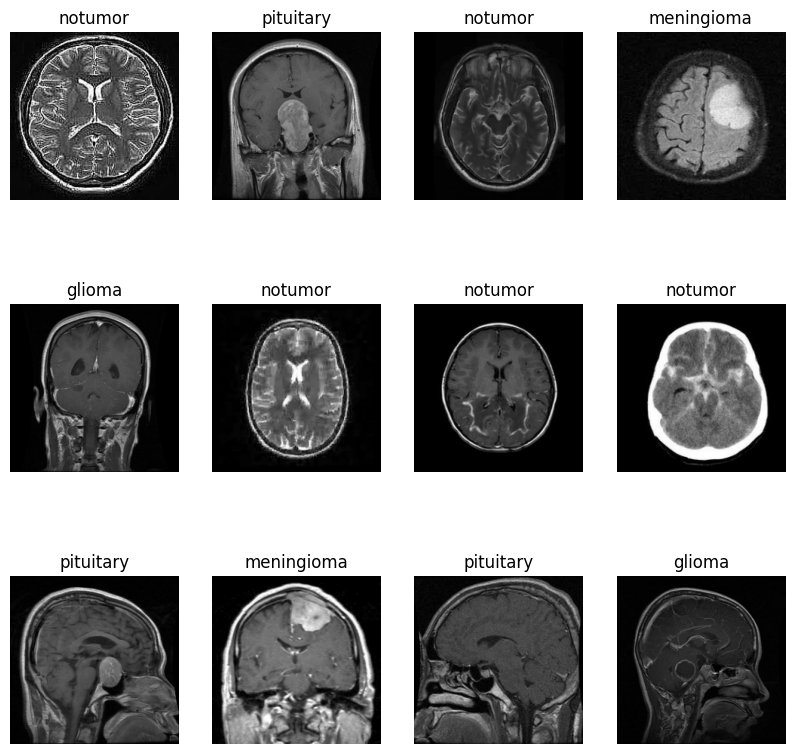

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        ax.imshow(image_batch[i].numpy().astype('uint8'))
        ax.set_title(class_name[label_batch[i].numpy()])
        ax.axis("off")
plt.show()


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

140

In [ ]:
len(val_ds)

17

In [ ]:
len(test_ds)

18

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomZoom(0.1),
    #layers.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,  # Redimensionnement et normalisation
    data_augmentation,   # Augmentation des données
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 100,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 382s 217ms/step - accuracy: 0.4432 - loss: 1.4779 - val_accuracy: 0.6893 - val_loss: 0.7879
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.6676 - loss: 0.8303 - val_accuracy: 0.7647 - val_loss: 0.5939
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.7079 - loss: 0.7419 - val_accuracy: 0.7812 - val_loss: 0.6141
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.7297 - loss: 0.6652 - val_accuracy: 0.7316 - val_loss: 0.6879
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.7400 - loss: 0.6509 - val_accuracy: 0.8180 - val_loss: 0.4576
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7475 - loss: 0.6126 - val_accuracy: 0.8235 - val_loss: 0.4323
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7778 - loss: 0.5383 - val_accuracy: 0.8199 - val_loss: 0.4840
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7973 - loss:

In [ ]:
model.evaluate(test_ds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9603 - loss: 0.0878


[0.11493954062461853, 0.9513888955116272]

In [ ]:
def predict_single(model, img, class_name):
    # Convertir l'image en tableau numpy et ajouter une dimension
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Ajouter une dimension (batch)

    # Faire des prédictions
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


In [ ]:
def predict_dataset(model, dataset, class_names):
    y_true = []
    y_pred = []

    # Parcourir le dataset pour faire des prédictions
    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        y_pred.extend(predicted_classes)
        y_true.extend(labels.numpy())  # Ajouter les étiquettes vraies

    return np.array(y_true), np.array(y_pred)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Prédire sur le dataset de test
y_true, y_pred = predict_dataset(model, test_ds, class_name)

# Générer le rapport de classification
report = classification_report(y_true, y_pred, target_names=class_name)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
              precision    recall  f1-score   support

      glioma       0.98      0.88      0.93       138
  meningioma       0.89      0.92      0.91       146
     notumor       0.95      1.00      0.98       143
   pituitary       0.98      1.00      0.99       149

    accuracy                           0.95

In [ ]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images)
    actual_class = class_name[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


In [ ]:
model.save("/content/pneumonia_savedmodel_1400/chest_pneumonia_model_600.keras")

In [ ]:
model.export("/content/pneumonia_savedmodel_1400/chest_pneumonia_model_600")

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,  # Redimensionnement et normalisation
    data_augmentation,   # Augmentation des données
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs = 100,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

In [ ]:
model.evaluate(test_ds)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Prédire sur le dataset de test
y_true, y_pred = predict_dataset(model, test_ds, class_name)

# Générer le rapport de classification
report = classification_report(y_true, y_pred, target_names=class_name)
print(report)


In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images)
    actual_class = class_name[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


In [ ]:
model.save("/content/drive/MyDrive/Brain_model_94.7%.keras")

In [ ]:
model.export("/content/drive/MyDrive/Brain_model_94.7%")

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,  # Redimensionnement et normalisation
    data_augmentation,   # Augmentation des données
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 100,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.4743 - loss: 1.4489 - val_accuracy: 0.8180 - val_loss: 0.5411
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.7427 - loss: 0.6400 - val_accuracy: 0.8548 - val_loss: 0.4166
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8009 - loss: 0.5214 - val_accuracy: 0.8401 - val_loss: 0.4271
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.8147 - loss: 0.4554 - val_accuracy: 0.8474 - val_loss: 0.3749
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.8366 - loss: 0.4138 - val_accuracy: 0.8897 - val_loss: 0.2949
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.8484 - loss: 0.3919 - val_accuracy: 0.9283 - val_loss: 0.2356
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.8840 - loss: 0.3008 - val_accuracy: 0.8989 - val_loss: 0.2651
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.8971 - loss: 0

In [ ]:
model.evaluate(test_ds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9867 - loss: 0.0434


[0.04904213547706604, 0.9826388955116272]

In [ ]:
#model avec RandomRotation avec 200 epochs
#model.evaluate(test_ds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9431 - loss: 0.1843


[0.14665552973747253, 0.953125]

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Prédire sur le dataset de test
y_true, y_pred = predict_dataset(model, test_ds, class_name)

# Générer le rapport de classification
report = classification_report(y_true, y_pred, target_names=class_name)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
              precision    recall  f1-score   support

      glioma       0.98      0.98      0.98       141
  meningioma       0.95      0.99      0.97       132
     notumor       1.00      0.99      0.99       134
   pituitary       1.00      0.98      0.99       169

    accuracy                           0.98

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


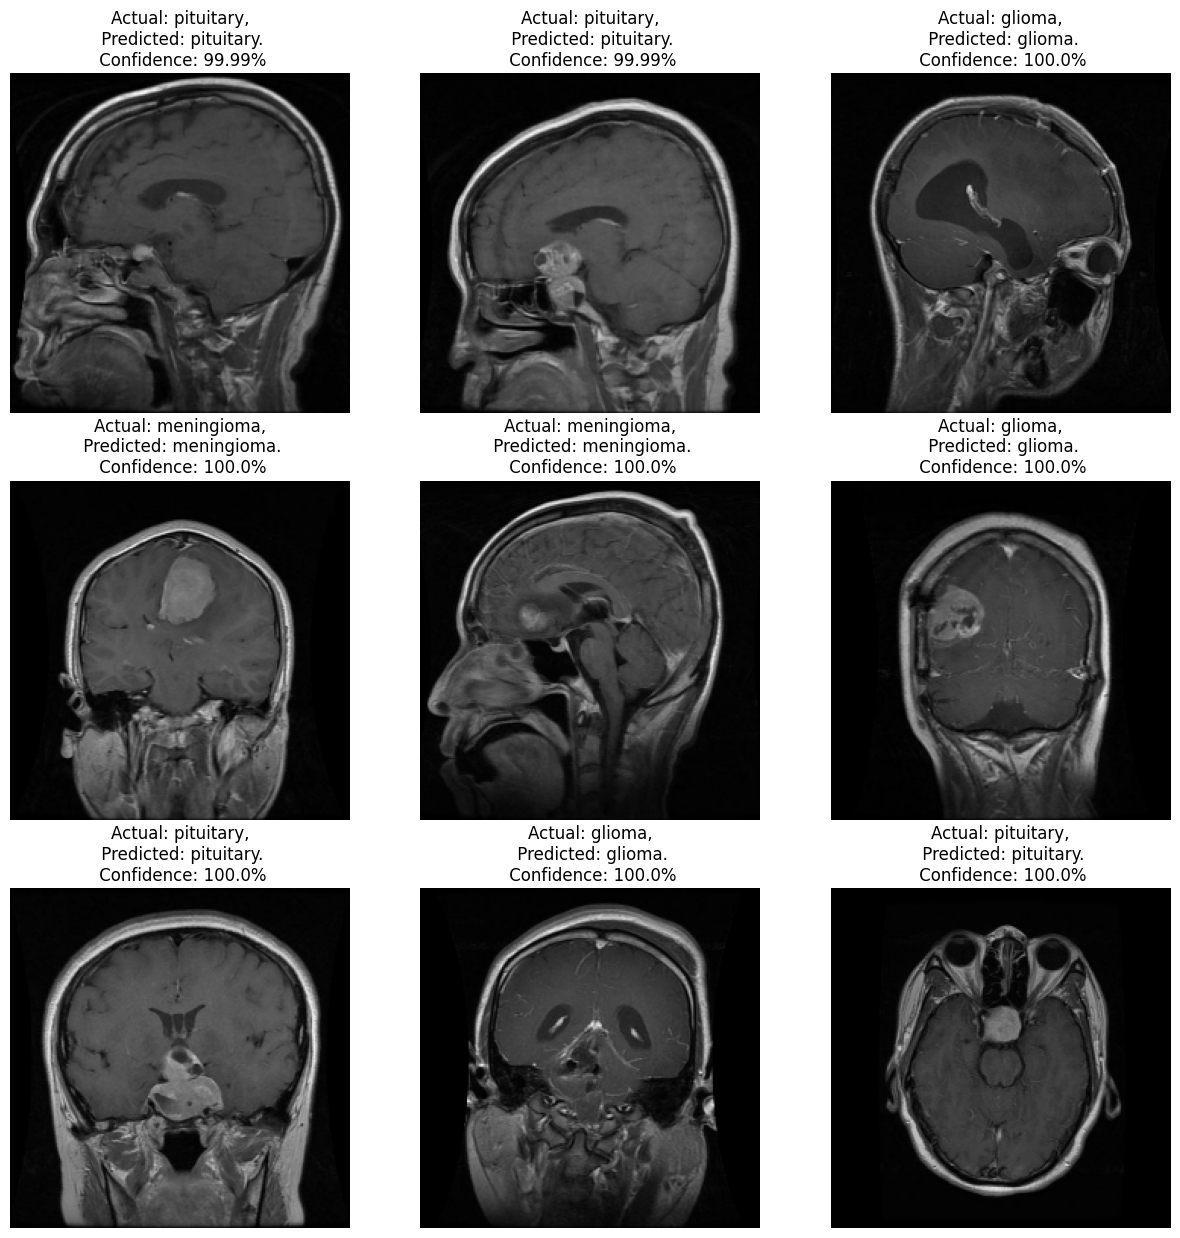

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images)
    actual_class = class_name[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


In [ ]:
model.save("/content/drive/MyDrive/Brain_model_v2.keras")

In [ ]:
model.export("/content/drive/MyDrive/Brain_model_v2")

Saved artifact at '/content/drive/MyDrive/Brain_model_v2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_26')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139898559529376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139898559530432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139897127943008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139897127941248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139897127943184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139897127940192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139897127943712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139896486117616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139896486121664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139896486119552: TensorSpec(shape=(), dtype=tf.resource, nam

In [ ]:
class_name = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
img_path = '/content/Te-me_0211.jpg'
img = tf.keras.utils.load_img(img_path)
predict_single(model, img, class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


('glioma_tumor', 55.74)